<a href="https://colab.research.google.com/github/chrismanzala/rproject/blob/Python-development/TP2_CHRISTIAN_MANZALA_KUMBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$\textbf{TP2 Optimisation}$$

# Exercice 1 


In [336]:
import numpy as np 
import matplotlib.pyplot as plt

In [349]:
#parametres du modele
p = 1000  #nombre de parametres de regression
n = p * 10  #nombre d'observations.

# Simulation d'un modèle linéaire. 
# Matrice de design
X = np.concatenate((np.ones((n, 1)), np.random.normal(0, 1, size=(n, p))), 
                   axis=1)
# Vecteur de paramètres.
th = np.arange(1, p+2).reshape(-1, 1)

In [350]:
# Résidus.
e = np.random.normal(0,1, size = (n, 1))
# Observations.
Y = np.dot(X, th) + e 

2. Calculer l’erreur quadratique moyenne 

$\mathrm J({\hat{\theta}}) = \frac{1}{n}|Y - X {\theta}|_2^2$

In [339]:
 J_th = np.sum((Y - np.dot(X,th))**2)/n

 print(J_th)

1.0006083189478943


3. A l’aide de la commande , résoudre le système linéaire 

$\mathrm{\hat{\theta}} = ({X}^{T}X)^{-1}X^{T}Y$

In [340]:
th_chapeau = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

print(th_chapeau)

[[   1.00389061]
 [   1.99274253]
 [   2.98783376]
 ...
 [ 999.00003525]
 [ 999.9978462 ]
 [1001.00491369]]


4. Calculer le temps d’exécution de cette fonction

In [341]:
import datetime as dt 

debut = dt.datetime.now()

th_chapeau

fin = dt.datetime.now()

temps = (fin - debut).total_seconds()

print(f"temps d'exécution:{temps} secondes")


temps d'exécution:8.1e-05 secondes


5. Calculer $\mathrm {J}({\hat{\theta}})$ et l’erreur d’estimation $\mathrm{E}({\hat{\theta}})$

In [342]:
#Fonctionelle quadratique estimée

J_th_chapeau = np.sum((Y - np.dot(X,th_chapeau))**2)/n 

print(J_th_chapeau)

0.9046745407561775


In [351]:
Erreur =np.abs(th_chapeau - th).sum() #Erreur d'estimation
 
print(Erreur)

8.279151072905549


#Exercice 2 

Définition des fonctions

In [344]:
# La fonctionelle quadratique à optimiser 
def J_th(X, th, Y, n):
    return ((Y - np.dot(X,th))**2).sum()/n


# Le gradient de la fonction
def grad_J(X, th, Y):
    return np.dot(X.T,(np.dot(X,th) - Y))

Initialisation

In [345]:
X = np.concatenate((np.ones((n, 1)), np.random.normal(0, 1, size=(n, p))), 
                   axis=1)

A = X.T.dot(X)

th = np.random.randn(1001,1)

e = np.random.normal(0,1, size = (n, 1))

Y = np.dot(X, th) + e 

F = J_th(X,th,Y,n)

$$\text{Descente de gradient à pas fixe}$$

$\mathrm ∇J(\hat{\theta}) = X^T(X{\theta}-Y)$

###### $$\textit{Mise en oeuvre de l'algorithme}$$

Itération 2 F = 0.8899353394386776
Itération 3 F = 0.8818948625291887
Itération 4 F = 0.8803853389766818
Itération 5 F = 0.8799955275805478
Itération 6 F = 0.8798735016144241
Itération 7 F = 0.8798302052528545
Itération 8 F = 0.8798135135674167
Itération 9 F = 0.8798067069776145
Itération 10 F = 0.8798038201780307
Itération 11 F = 0.879802560230791
Itération 12 F = 0.8798019981891463
Itération 13 F = 0.8798017431065877
Itération 14 F = 0.8798016256972907
Itération 15 F = 0.8798015710183572
Itération 16 F = 0.8798015452989215
Itération 17 F = 0.8798015330972848
Itération 18 F = 0.8798015272655675
Itération 19 F = 0.8798015244602091
Itération 20 F = 0.8798015231029902
Itération 21 F = 0.8798015224430746
Itération 22 F = 0.8798015221207804
Itération 23 F = 0.8798015219627545
Itération 24 F = 0.8798015218850002
Itération 25 F = 0.8798015218466227
Itération 26 F = 0.8798015218276279
Itération 27 F = 0.8798015218182021
Itération 28 F = 0.879801521813514
Itération 29 F = 0.8798015218111784
It

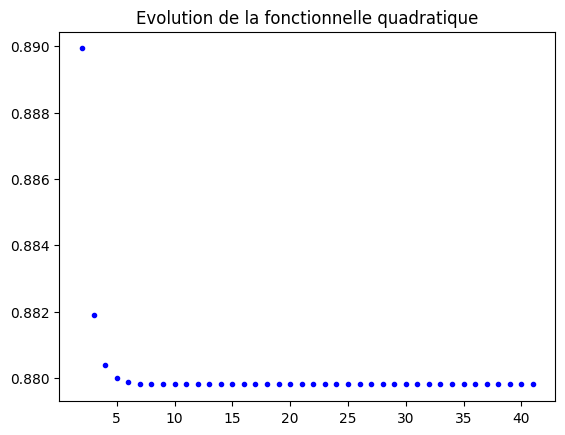

In [346]:
debut = dt.datetime.now() # temps d'exécution

# Le nombre maximal d'itérations à effectuer
num_iterations = 100

# La précision à atteindre
tolerance = 0.01

# Le pas initial
eta = 0.0001

# La descente de gradient avec un pas fixe
for iteration in range(2,num_iterations):

    # Gradient de la fonction au point actuel
    d = grad_J(X,th,Y)
    
    if np.abs(d).sum() < tolerance:
      break
    else:
      th = th - (eta*d) # Mise à jour the theta

      F = J_th(X,th,Y,n) # Minimisation de la fonctionnelle quadratique
      
      plt.plot(iteration, F,'b.', label = 'F')
      plt.title("Evolution de la fonctionnelle quadratique")
      
    # Le point actuel 
    print(f"Itération {iteration} F = {F}")
    

fin = dt.datetime.now()

temps = (fin - debut).total_seconds() # temps total 

print("\n \n temps d'éxécution:", temps, ":secondes \n \n")


Le pas "eta", qui a joué ici un rôle majeur, a été choisi de telle sorte que le minimum soit atteint rapidement et efficacement. On constate que la méthode à pas fixe converge mieux que celle du système linéaire avec un **F = 0.879** qui est inférieur à **0.904** du sytème linéaire. En terme de temps d'exécution, l'algorithme de descente de gradient est plus lent que la recherche par résolution du système linéaire avec **1.2 s** pour la descente de gradient contre **8.1e-5 s** pour le système linéaire.

Ainsi, une augmentation du nombre de variables pourrait engendrer plus de difficultés pour l'algorithme à converger efficacement vers le point minimal 

# Exercice 3 

$$\text{Descente de gradient à pas optimal}$$


$\mathrm \rho = \frac {|d|^2}{\langle{Ad,d}\rangle}$

Initialisation

In [347]:
X = np.concatenate((np.ones((n, 1)), np.random.normal(0, 1, size=(n, p))), 
                   axis=1)

A = X.T.dot(X)

th = np.random.randn(1001,1)

e = np.random.normal(0,1, size = (n, 1))

Y = np.dot(X, th) + e 

F = J_th(X,th,Y,n)

$$\textit{Mise en oeuvre de l'algotihme}$$

Itération 2 F= 0.8949797261850164
Itération 3 F= 0.8880336139947674
Itération 4 F= 0.8868753497894988
Itération 5 F= 0.8866346549748189
Itération 6 F= 0.8865787717274234
Itération 7 F= 0.8865649053695328
Itération 8 F= 0.8865613084125471
Itération 9 F= 0.8865603444881953
Itération 10 F= 0.8865600796147861
Itération 11 F= 0.8865600053475624
Itération 12 F= 0.886559984177034
Itération 13 F= 0.8865599780582776
Itération 14 F= 0.8865599762692103
Itération 15 F= 0.8865599757409307
Itération 16 F= 0.8865599755836292
Itération 17 F= 0.8865599755364539
Itération 18 F= 0.8865599755222191
Itération 19 F= 0.8865599755178999
Itération 20 F= 0.886559975516584
Itération 21 F= 0.8865599755161809
Itération 22 F= 0.8865599755160573
Itération 23 F= 0.8865599755160196
Itération 24 F= 0.8865599755160082
Itération 25 F= 0.8865599755160041

 
  temps d'exécution: 0.655657 secondes  
 
 


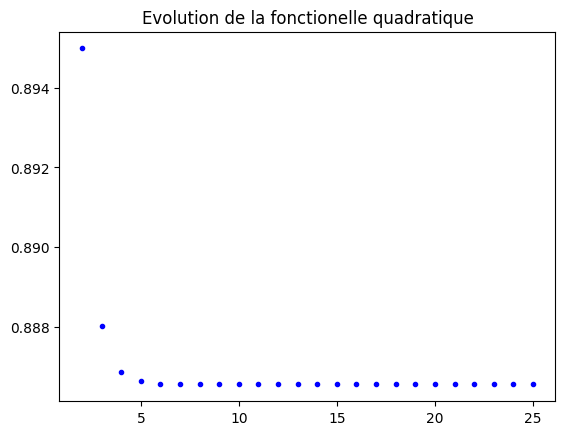

In [348]:
debut = dt.datetime.now()


# Le nombre maximal d'itérations à effectuer
num_iterations = 100

# La précision à atteindre
tolerance = 0.01

# La descente de gradient avec un pas optimal
for iteration in range(2,num_iterations):

    # Gradient de la fonction au point actuel
    d = grad_J(X,th,Y)
    eta = (d**2).sum()/(d.T.dot(A.T).dot(d)) # Calcul du pas 
    
    if np.abs(d).sum() < tolerance:
      break
    else:
      th = th - (eta*d) # Mise à jour de theta
      F = J_th(X,th,Y,n) # Minimisation de la fonctionnelle quadratique
      plt.plot(iteration, F,'b.', label = 'F')
      plt.title("Evolution de la fonctionelle quadratique")
    
    # Le point actuel et la valeur de la fonction au point actuel
    print(f"Itération {iteration} F= {F}")


fin = dt.datetime.now()

temps = (fin -debut).total_seconds() 

print(f"\n \n  temps d'exécution: {temps} secondes  \n \n ")

Le pas "eta" a été défini de telle sorte que le minimum soit atteint de façon optimale. On constate que la méthode à pas optimal converge mieux que celle du système linéaire avec un **F = 0.886** qui est inférieur à **0.904** du système liéaire. En terme de temps d'exécution, l'algorithme de descente de gradient à pas optimal est plus lent que la recherche par résolution du système linéaire avec **0.6 s** pour la descente de gradient contre **8.1e-5 s** pour le système linéaire.
